In [2]:
!pip install ultralytics roboflow opencv-python numpy matplotlib


In [4]:
from roboflow import Roboflow
import os
import cv2
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
import zipfile

In [6]:
rf = Roboflow(api_key="t9SKxNWVzaS279HO9TJY")  
project = rf.workspace("roboflow-universe-projects").project("beverage-containers-3atxb")
version = project.version(3)
dataset = version.download("yolov8", location="C:/Users/Hp/Beverage-Containers-3")

loading Roboflow workspace...
loading Roboflow project...


In [8]:
data_path = "C:/Users/Hp/Beverage-Containers-3"
print(f"✅ Dataset successfully downloaded to: {data_path}")

✅ Dataset successfully downloaded to: C:/Users/Hp/Beverage-Containers-3


In [10]:
if os.path.exists(data_path):
    print("✅ Dataset folder found! Checking structure...")
    print(os.listdir(data_path))
else:
    print("❌ Dataset folder NOT found! Check your download.")


✅ Dataset folder found! Checking structure...
['data.yaml', 'README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid']


In [12]:
test_images_dir = os.path.join(data_path, "test/images")
if os.path.exists(test_images_dir):
    print(f"✅ Test images directory found! Total images: {len(os.listdir(test_images_dir))}")
else:
    print("❌ Test images directory NOT found! Check dataset structure.")


✅ Test images directory found! Total images: 653


Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.


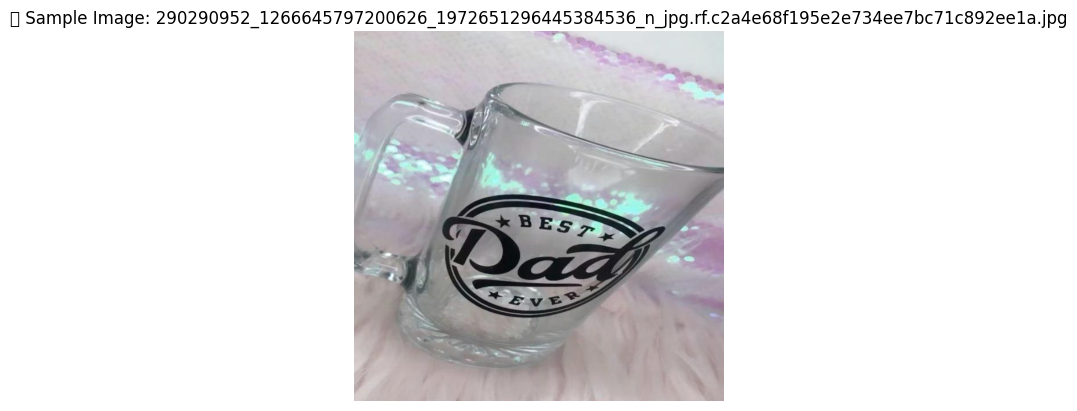

In [15]:
if os.path.exists(test_images_dir):
    images = os.listdir(test_images_dir)
    if images:
        random_img = random.choice(images)
        img_path = os.path.join(test_images_dir, random_img)
        img = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"📷 Sample Image: {random_img}")
        plt.show()
    else:
        print("❌ No images found in test dataset.")
else:
    print("❌ Test image folder not found. Check dataset structure.")

In [17]:
model = YOLO("yolov8n.pt")  # 'n' is the smallest model for fast inference


In [19]:
results = model.predict(source=test_images_dir, save=True, verbose=False)
print("✅ Inference complete! Check the saved results.")

Results saved to runs\detect\predict
✅ Inference complete! Check the saved results.


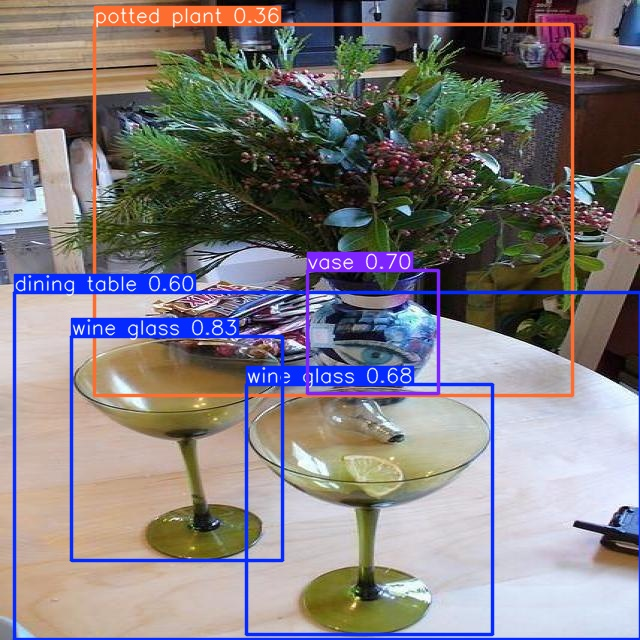

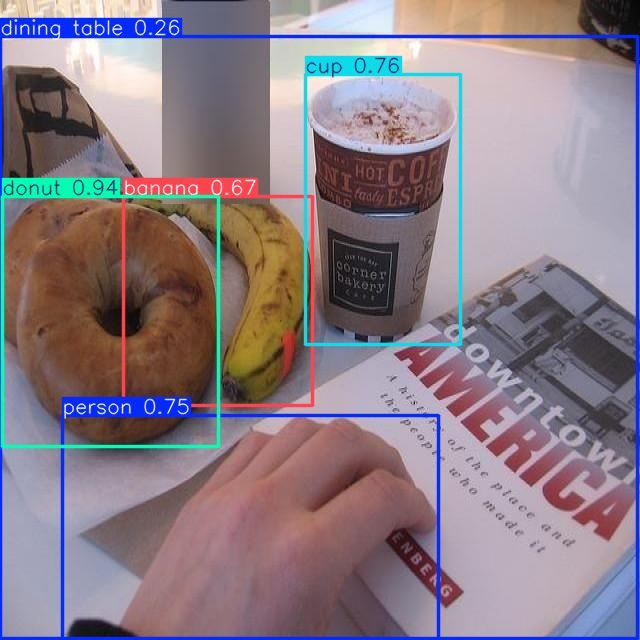

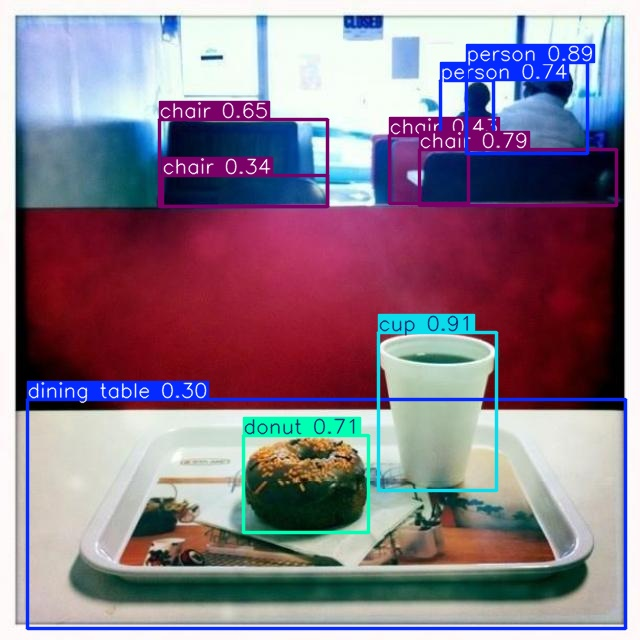

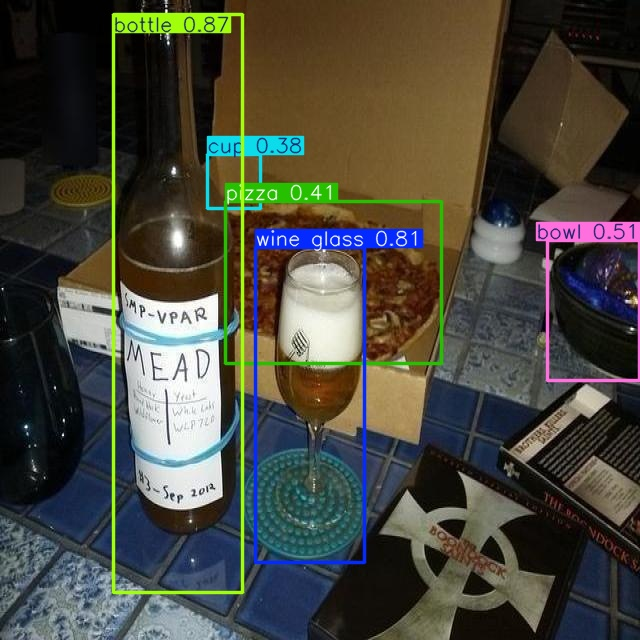

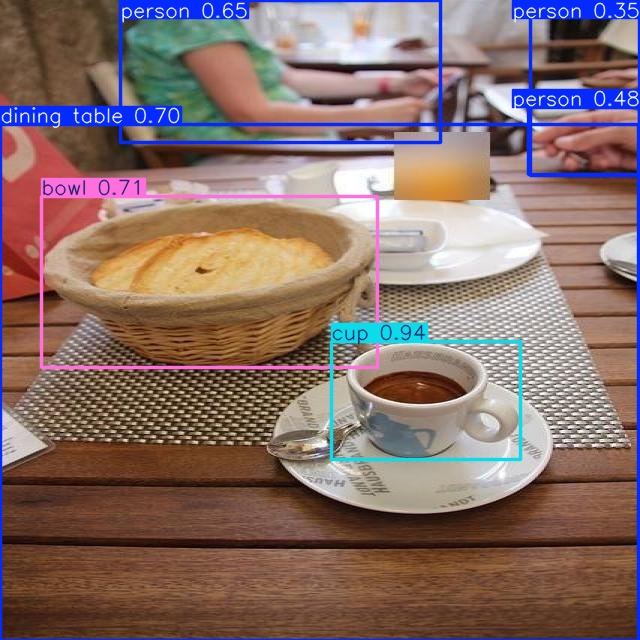

In [20]:
from IPython.display import display, Image
output_dir = "runs/detect/predict"
if os.path.exists(output_dir):
    output_images = os.listdir(output_dir)
    for img_file in output_images[:5]:  # Show first 5 images
        display(Image(filename=os.path.join(output_dir, img_file)))
else:
    print("❌ No output images found! Check if inference ran correctly.")


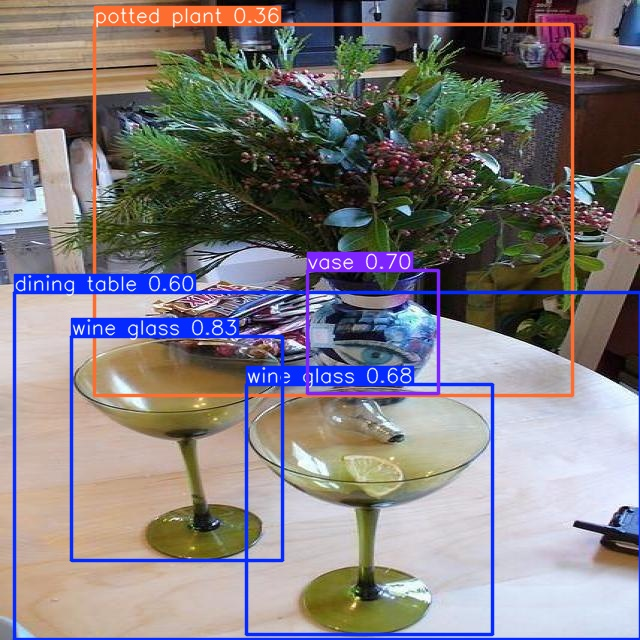

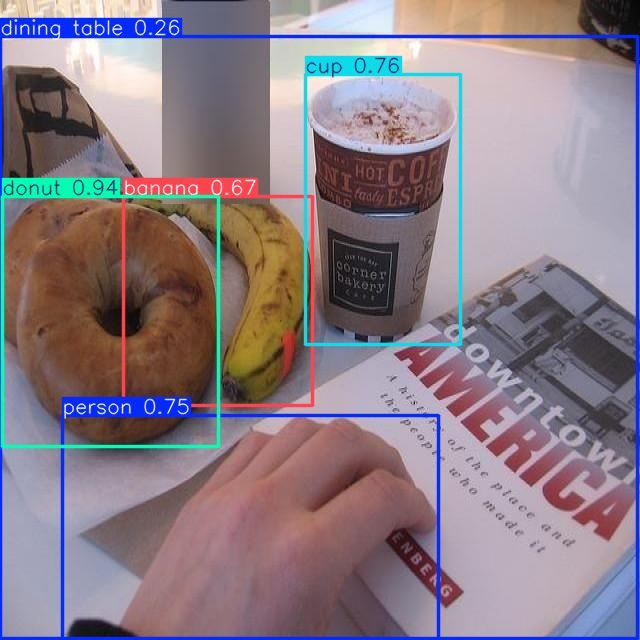

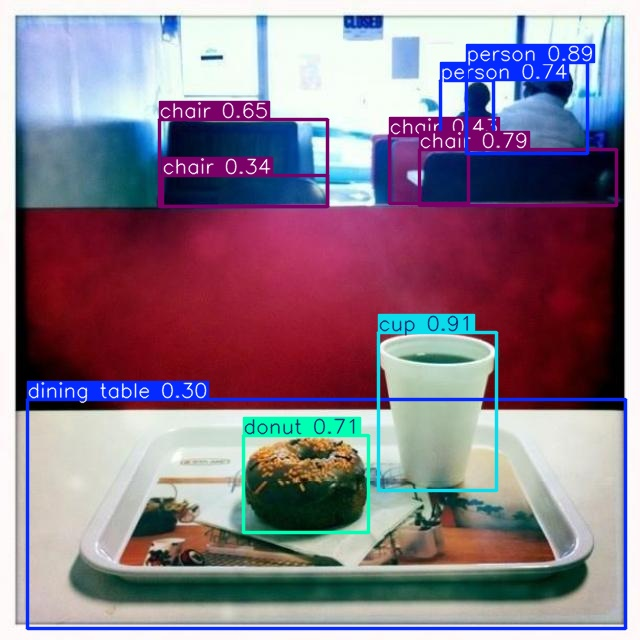

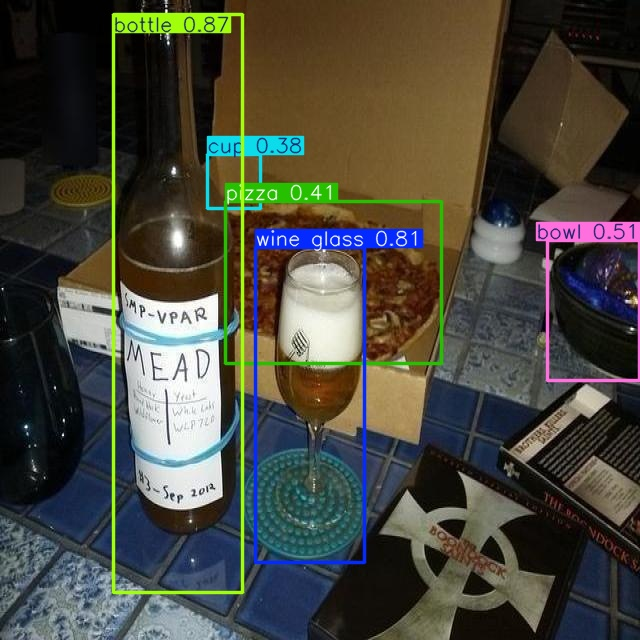

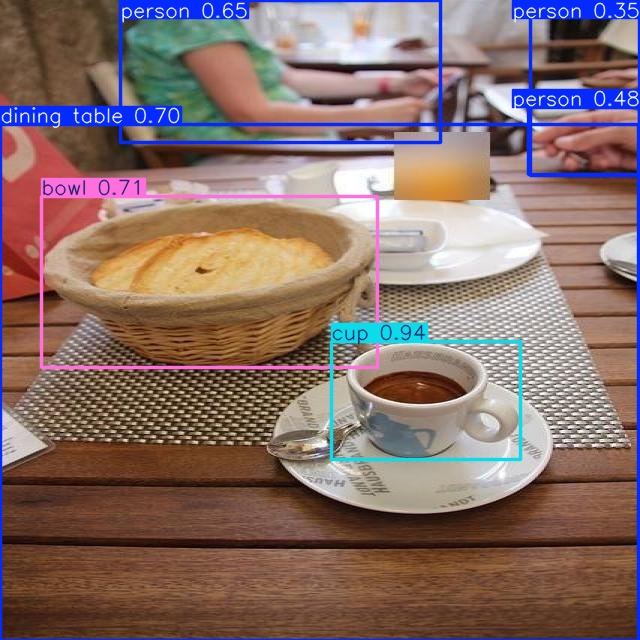

In [21]:
from IPython.display import display, Image
output_dir = "runs/detect/predict"
if os.path.exists(output_dir):
    output_images = os.listdir(output_dir)
    for img_file in output_images[:5]:  # Show first 5 images
        display(Image(filename=os.path.join(output_dir, img_file)))
else:
    print("❌ No output images found! Check if inference ran correctly.")


In [22]:
results = model.predict(
    source=test_images_dir, 
    save=True, 
    project="C:/Users/Hp/Beverage-Containers-3/detections", 
    name="bev_containers_results",
    exist_ok=True
)
print("✅ Inference completed! Images saved in C:/Users/Hp/Beverage-Containers-3/detections/bev_containers_results/")


Results saved to C:\Users\Hp\Beverage-Containers-3\detections\bev_containers_results
✅ Inference completed! Images saved in C:/Users/Hp/Beverage-Containers-3/detections/bev_containers_results/


In [27]:
# Step 9: Run YOLOv8 Inference on a Video

# Path to your own video file
video_path = "D:\propropropri\exports\AI.mp4"  # Change this to your video file path
output_video_path = "D:\AIPDS\detected video\output_video.mp4"  # Path to save the detected video

# Check if video file exists
if not os.path.exists(video_path):
    print("❌ Video file not found! Check the path.")
else:
    print(f"✅ Video file found: {video_path}")


✅ Video file found: D:\propropropri\exports\AI.mp4


In [29]:
import cv2

# Load the video
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Video width
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Video height
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec for saving video

# Create a VideoWriter object to save output
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

print(f"✅ Processing video... Saving to: {output_video_path}")

# Process the video frame-by-frame
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break  # Exit loop if video ends

    # Run YOLOv8 inference on the frame
    results = model(frame)

    # Draw detections on the frame
    annotated_frame = results[0].plot()

    # Show the frame
    cv2.imshow("YOLOv8 Detection", annotated_frame)

    # Write the frame to the output video
    out.write(annotated_frame)

    # Press 'q' to exit early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video objects
cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Video processing complete! Check the saved video.")


✅ Processing video... Saving to: D:\AIPDS\detected video\output_video.mp4
✅ Video processing complete! Check the saved video.


In [5]:
# Ensure Roboflow is imported
from roboflow import Roboflow  

# Initialize Roboflow
rf = Roboflow(api_key="t9SKxNWVzaS279HO9TJY")  

# Download the Fruits & Vegetables dataset (heavy, stored in D: drive)
project_vege = rf.workspace("zzigmug").project("fruits-and-vegetables-knetf")
dataset_vege = project_vege.version(3).download("yolov8", location="D:\AIPDS\VegeFruitDS")

data_path_vege = "D:\AIPDS\VegeFruitDS"
print(f"✅ Fruits & Vegetables dataset downloaded to: {data_path_vege}")


loading Roboflow workspace...
loading Roboflow project...
✅ Fruits & Vegetables dataset downloaded to: D:\AIPDS\VegeFruitDS


In [21]:
from roboflow import Roboflow

# Initialize Roboflow
rf = Roboflow(api_key="t9SKxNWVzaS279HO9TJY")

# Download dataset WITHOUT specifying a directory
project_vege = rf.workspace("zzigmug").project("fruits-and-vegetables-knetf")
dataset_vege = project_vege.version(3).download("yolov8")

print("✅ Download complete! Check where the dataset is stored.")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fruits-and-Vegetables-3 in yolov8:: 100%|██████████| 8778/8778 [00:09<00:00, 888.43it/s] 


✅ Download complete! Check where the dataset is stored.


In [25]:
import os

merged_dataset = "D:/YOLO_Dataset/Merged-Dataset"

# Define dataset splits
splits = ["train", "valid", "test"]
sub_folders = ["images", "labels"]

# Create necessary directories
for split in splits:
    for sub in sub_folders:
        os.makedirs(os.path.join(merged_dataset, split, sub), exist_ok=True)

print("✅ Folder structure created successfully!")


✅ Folder structure created successfully!


In [27]:
import shutil

# Define dataset paths
dataset_1 = "C:/Users/Hp/Beverage-Containers-3"
dataset_2 = "D:/AIPDS/VegeFruitDS"

def merge_folders(src_folder, dst_folder):
    if os.path.exists(src_folder):
        for file in os.listdir(src_folder):
            shutil.copy(os.path.join(src_folder, file), os.path.join(dst_folder, file))

# Merge images and labels from both datasets
for split in splits:
    merge_folders(os.path.join(dataset_1, split, "images"), os.path.join(merged_dataset, split, "images"))
    merge_folders(os.path.join(dataset_1, split, "labels"), os.path.join(merged_dataset, split, "labels"))
    
    merge_folders(os.path.join(dataset_2, split, "images"), os.path.join(merged_dataset, split, "images"))
    merge_folders(os.path.join(dataset_2, split, "labels"), os.path.join(merged_dataset, split, "labels"))

print("✅ Datasets successfully merged into:", merged_dataset)


✅ Datasets successfully merged into: D:/YOLO_Dataset/Merged-Dataset


In [29]:
for split in splits:
    for sub in sub_folders:
        folder_path = os.path.join(merged_dataset, split, sub)
        if os.path.exists(folder_path):
            print(f"✅ {split}/{sub} - {len(os.listdir(folder_path))} files")
        else:
            print(f"❌ Missing folder: {folder_path}")


✅ train/images - 17520 files
✅ train/labels - 17520 files
✅ valid/images - 1666 files
✅ valid/labels - 1666 files
✅ test/images - 842 files
✅ test/labels - 842 files


In [1]:
data_yaml_path = "D:/YOLO_Dataset/Merged-Dataset/data.yaml"

with open(data_yaml_path, "w") as f:
    f.write(
        "train: D:/YOLO_Dataset/Merged-Dataset/train/images\n"
        "val: D:/YOLO_Dataset/Merged-Dataset/valid/images\n"
        "test: D:/YOLO_Dataset/Merged-Dataset/test/images\n"
        "\n"
        "nc: 25  # Total number of classes\n"
        "names: ['Coke', 'Pepsi', 'Juice', 'Milk', 'Water', 'Beer', 'Tea', 'Energy Drink',\n"
        "        'Soda', 'Snack', 'Chips', 'Bread', 'Cereal', 'Candy', 'Ice Cream',\n"
        "        'Apple', 'Banana', 'Orange', 'Carrot', 'Tomato', 'Cucumber', 'Grapes',\n"
        "        'Pineapple', 'Broccoli', 'Lettuce']"
    )

print("✅ `data.yaml` file updated successfully!")


✅ `data.yaml` file updated successfully!


In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model (you can use yolov8n.pt, yolov8s.pt, etc.)
model = YOLO("yolov8n.pt")  # Using the lightweight YOLOv8 Nano model

# Path to `data.yaml`
data_yaml = "D:/YOLO_Dataset/Merged-Dataset/data.yaml"

# Train the model
model.train(data=data_yaml, epochs=50, imgsz=640)

print("✅ Training complete on merged dataset!")


New https://pypi.org/project/ultralytics/8.3.81 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.80  Python-3.10.16 torch-2.5.1 CPU (Intel Core(TM) i5-10210U 1.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/YOLO_Dataset/Merged-Dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

train: Scanning D:\YOLO_Dataset\Merged-Dataset\train\labels.cache... 17520 images, 24 backgrounds, 0 corrupt: 100%|██████████| 17520/17520 [00:00<?, ?it/s]


albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Scanning D:\YOLO_Dataset\Merged-Dataset\valid\labels.cache... 1666 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1666/1666 [00:00<?, ?it/s]


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.188      3.439      1.532         44        640: 100%|██████████| 1095/1095 [2:35:53<00:00,  8.54s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [05:48<00:00,  6.57s/it]


                   all       1666       2728      0.452      0.316      0.219       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.161      2.746      1.489         85        640:  37%|███▋      | 410/1095 [56:26<1:48:37,  9.51s/it]

In [1]:
pip install ultralytics opencv-python numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
1+1

2

In [5]:
from ultralytics import YOLO

# Load the YOLOv8 Nano model
model = YOLO("yolov8n.pt")

# Path to dataset config
data_yaml = "D:/YOLO_Dataset/Merged-Dataset/data.yaml"

# Optimized training for CPU
model.train(
    data=data_yaml, 
    epochs=5,  # Minimal training time
    imgsz=320,  # Lower resolution for faster processing
    batch=8,  # Small batch size (CPU-friendly)
    device="cpu"  # Force CPU usage
)

print("✅ Ultra-fast CPU training complete!")


New https://pypi.org/project/ultralytics/8.3.82 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.80  Python-3.10.16 torch-2.5.1 CPU (Intel Core(TM) i5-10210U 1.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/YOLO_Dataset/Merged-Dataset/data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=320, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning D:\YOLO_Dataset\Merged-Dataset\train\labels.cache... 17520 images, 24 backgrounds, 0 corrupt: 100%|██████████| 17520/17520 [00:00<?, ?it/s]


albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Scanning D:\YOLO_Dataset\Merged-Dataset\valid\labels.cache... 1666 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1666/1666 [00:00<?, ?it/s]


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.287      3.228      1.455         32        320: 100%|██████████| 2190/2190 [45:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [01:52<00:00,  1.07s/it]


                   all       1666       2728      0.412      0.334      0.269       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.199      2.359      1.401         29        320: 100%|██████████| 2190/2190 [36:22<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [01:28<00:00,  1.19it/s]


                   all       1666       2728      0.386       0.45      0.391       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.151      2.123      1.352         15        320: 100%|██████████| 2190/2190 [35:55<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [01:28<00:00,  1.19it/s]


                   all       1666       2728      0.518      0.459      0.478      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G        1.1      1.936      1.307         21        320: 100%|██████████| 2190/2190 [35:47<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [01:25<00:00,  1.22it/s]


                   all       1666       2728      0.611      0.554      0.568      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.048      1.786      1.275         16        320: 100%|██████████| 2190/2190 [35:44<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [01:26<00:00,  1.22it/s]


                   all       1666       2728      0.636      0.539      0.604      0.378

5 epochs completed in 3.282 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.2MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.80  Python-3.10.16 torch-2.5.1 CPU (Intel Core(TM) i5-10210U 1.60GHz)
Model summary (fused): 72 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [01:12<00:00,  1.45it/s]


                   all       1666       2728      0.634      0.542      0.604      0.378
                  Coke        210        319      0.875      0.767      0.876      0.553
                 Pepsi        187        238      0.752      0.753      0.823      0.532
                 Juice        163        315      0.765      0.704      0.793      0.476
                  Milk        204        225      0.761      0.919       0.91      0.625
                 Water        188        277      0.741      0.686       0.76      0.539
                  Beer        179        274       0.74      0.599      0.687      0.431
                   Tea        166        242      0.796      0.818      0.858      0.536
          Energy Drink        161        256      0.765      0.738      0.824      0.551
                  Soda        143        219       0.88      0.689      0.826      0.637
                 Snack          6         19          1          0      0.341      0.179
                 Chip

In [ ]:
import cv2
from ultralytics import YOLO

# Paths
video_path = "D:/propropropri/exports/AI.mp4"
output_video_path = "D:/YOLO_Dataset/detected_video_merged.mp4"

# Load the trained YOLO model
model = YOLO("runs/detect/train4/weights/best.pt")

# Open video
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    results = model(frame)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)
    cv2.imshow("YOLOv8 Detection", annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Video processing complete! Check:", output_video_path)



0: 320x192 1 Pepsi, 195.5ms
Speed: 2.3ms preprocess, 195.5ms inference, 64.5ms postprocess per image at shape (1, 3, 320, 192)

0: 320x192 2 Pepsis, 46.2ms
Speed: 3.3ms preprocess, 46.2ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 192)

0: 320x192 2 Pepsis, 36.7ms
Speed: 1.1ms preprocess, 36.7ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 192)

0: 320x192 1 Pepsi, 40.3ms
Speed: 4.3ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 192)

0: 320x192 1 Pepsi, 38.0ms
Speed: 1.7ms preprocess, 38.0ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 192)

0: 320x192 1 Pepsi, 39.2ms
Speed: 1.5ms preprocess, 39.2ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 192)

0: 320x192 1 Pepsi, 34.8ms
Speed: 1.0ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 192)

0: 320x192 1 Pepsi, 33.0ms
Speed: 2.7ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 

In [1]:
import cv2
from ultralytics import YOLO

# Paths
video_path = "D:/propropropri/exports/AI.mp4"  # Input video
output_video_path = "D:/AIPDS/detected_video_large.mp4"  # Output video

# Load the YOLOv8 Large model
model = YOLO("yolov8l.pt")  # Large model (high accuracy, slower speed)

# Open video
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

print(f"✅ Processing video using YOLOv8 Large... Saving to: {output_video_path}")

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Run YOLO inference on the frame
    results = model(frame)

    # Annotate frame
    annotated_frame = results[0].plot()
    out.write(annotated_frame)
    cv2.imshow("YOLOv8 Large Detection", annotated_frame)

    # Press 'q' to exit early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Video processing complete! Check the output video:", output_video_path)


100%|██████████| 83.7M/83.7M [00:50<00:00, 1.74MB/s]


✅ Processing video using YOLOv8 Large... Saving to: D:/AIPDS/detected_video_large.mp4

0: 640x384 6 persons, 1 backpack, 2 handbags, 3760.2ms
Speed: 357.6ms preprocess, 3760.2ms inference, 1006.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 backpack, 2 handbags, 566.2ms
Speed: 5.5ms preprocess, 566.2ms inference, 10.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 handbag, 618.6ms
Speed: 3.3ms preprocess, 618.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 2 handbags, 590.4ms
Speed: 3.1ms preprocess, 590.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 handbag, 575.4ms
Speed: 2.8ms preprocess, 575.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 handbag, 586.0ms
Speed: 3.8ms preprocess, 586.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 handbag, 638.8

In [5]:
pip install effdet==0.4.1 timm==1.0.15 opencv-python==4.11.0.86


  Using cached effdet-0.4.1-py3-none-any.whl.metadata (33 kB)
  Using cached timm-1.0.15-py3-none-any.whl.metadata (52 kB)
  Using cached huggingface_hub-0.29.1-py3-none-any.whl.metadata (13 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
Using cached effdet-0.4.1-py3-none-any.whl (112 kB)
Using cached timm-1.0.15-py3-none-any.whl (2.4 MB)
Using cached huggingface_hub-0.29.1-py3-none-any.whl (468 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import os
from effdet import get_efficientdet_config, EfficientDet
from effdet.efficientdet import HeadNet

# Path to manually downloaded EfficientDet weights
weights_path = "D:/AIPDS/models/tf_efficientdet_d4_ap-f601a5fc.pth"

# Check if the file exists
if not os.path.exists(weights_path):
    raise FileNotFoundError(f"❌ Model weights not found! Make sure {weights_path} exists.")

# Load EfficientDet-D4 model
model_name = "tf_efficientdet_d4"
config = get_efficientdet_config(model_name)
model = EfficientDet(config)

# Load weights
checkpoint = torch.load(weights_path, map_location=torch.device("cpu"))
model.load_state_dict(checkpoint)

# Attach detection head for COCO dataset (90 classes)
model.head = HeadNet(config, num_outputs=90)
model.eval()

print("✅ EfficientDet-D4 model loaded successfully!")


C:\Users\Hp\AppData\Local\Temp\ipykernel_10048\3940325220.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(weights_path, map_location=torch.devic

✅ EfficientDet-D4 model loaded successfully!


In [ ]:
import torch
import cv2
import numpy as np
from torchvision import transforms
from effdet import get_efficientdet_config, EfficientDet, DetBenchPredict
from effdet.efficientdet import HeadNet

# 🔹 Use the correct PyTorch-trained weights (not TensorFlow-converted)
weights_path = "D:/AIPDS/models/tf_efficientdet_d4-5b370b7a.pth"  # Correct PyTorch-trained weights

# 🔹 Load EfficientDet configuration
config = get_efficientdet_config("efficientdet_d4")  # No 'tf_' prefix
model = EfficientDet(config)

# 🔹 Attach detection head (COCO dataset with 90 classes)
model.head = HeadNet(config, num_outputs=90)

# 🔹 Load the correct pretrained weights
checkpoint = torch.load(weights_path, map_location=torch.device("cpu"))
model.load_state_dict(checkpoint, strict=False)  # Ignore non-matching layers

# 🔹 Wrap model for inference
model = DetBenchPredict(model)
model.eval()

print("✅ EfficientDet-D4 model loaded successfully!")

# 🔹 Load video
video_path = "D:/propropropri/exports/AI.mp4"
output_video_path = "D:/AIPDS/detected_video_efficientdet2.mp4"

cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# 🔹 Ensure correct input size for EfficientDet-D4
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((1024, 1024))  # EfficientDet-D4 expects 1024x1024 input
])

print(f"✅ Processing video using EfficientDet... Saving to: {output_video_path}")

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Convert image to tensor
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # 🔹 Run inference
    with torch.no_grad():
        predictions = model(image_tensor)  # EfficientDet output

    # 🔹 Extract detection results (bounding boxes, scores, class labels)
    preds = predictions[0].detach().cpu().numpy()  # Convert to NumPy array

    # 🔹 Draw boxes on the frame
    for i in range(preds.shape[0]):
        x1, y1, x2, y2, score, label = preds[i]

        if score > 0.4:  # Confidence threshold
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])  # Bounding box coordinates
            label_text = f"Object {int(label)} ({score:.2f})"

            # Draw rectangle and label on frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    out.write(frame)
    cv2.imshow("EfficientDet Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to stop
        break

cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Video processing complete! Check:", output_video_path)


C:\Users\Hp\AppData\Local\Temp\ipykernel_10048\1579862246.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(weights_path, map_location=torch.devic

✅ EfficientDet-D4 model loaded successfully!
✅ Processing video using EfficientDet... Saving to: D:/AIPDS/detected_video_efficientdet2.mp4


In [ ]:
import cv2
from ultralytics import YOLO
import torch

# 🔹 Load the best YOLOv8 model (use 'cuda' if you have a GPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = YOLO("yolov8l.pt").to(device)  # Use Large model for better accuracy

# 🔹 Video Paths
video_path = "D:/propropropri/exports/AI.mp4"
output_video_path = "D:/AIPDS/detected_video_yolov8.mp4"

# 🔹 Load the video
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

print(f"✅ Processing video... Saving to: {output_video_path}")

# 🔹 Process frames efficiently
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break  # Exit loop if video ends

    # 🔹 Run YOLOv8 inference on the frame (FAST MODE)
    results = model.predict(frame, conf=0.4, iou=0.5, half=True, device=device)  # Lower confidence for more detections

    # 🔹 Draw detections on the frame
    annotated_frame = results[0].plot()

    # 🔹 Show and save the frame
    cv2.imshow("YOLOv8 Detection", annotated_frame)
    out.write(annotated_frame)

    # Press 'q' to exit early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 🔹 Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Video processing complete! Check:", output_video_path)


✅ Processing video... Saving to: D:/AIPDS/detected_video_yolov8.mp4

0: 640x384 5 persons, 1 backpack, 2 handbags, 168655.8ms
Speed: 543.0ms preprocess, 168655.8ms inference, 433.3ms postprocess per image at shape (1, 3, 640, 384)



In [2]:
import cv2
from ultralytics import YOLO
import torch

# 🔹 Force CPU usage since MX110 is too weak
device = "cpu"
model = YOLO("yolov8x.pt").to(device)  # YOLOv8X (Extra Large) for best accuracy

# 🔹 Video Paths
video_path = "D:/propropropri/exports/AI.mp4"
output_video_path = "D:/AIPDS/detected_video_yolov8x_cpu.mp4"

# 🔹 Load the video
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

print(f"✅ Processing video with YOLOv8X on CPU... Saving to: {output_video_path}")

# 🔹 Process frames efficiently
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break  # Exit loop if video ends

    # 🔹 Run YOLOv8X inference on the frame with optimizations
    results = model.predict(frame, conf=0.4, iou=0.5, device=device)

    # 🔹 Draw detections on the frame
    annotated_frame = results[0].plot()

    # 🔹 Show and save the frame
    cv2.imshow("YOLOv8X CPU Detection", annotated_frame)
    out.write(annotated_frame)

    # Press 'q' to exit early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 🔹 Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Video processing complete! Check:", output_video_path)


100%|██████████| 131M/131M [03:22<00:00, 678kB/s]  


✅ Processing video with YOLOv8X on CPU... Saving to: D:/AIPDS/detected_video_yolov8x_cpu.mp4

0: 640x384 5 persons, 1 handbag, 2501.0ms
Speed: 28.0ms preprocess, 2501.0ms inference, 26.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 handbag, 1013.4ms
Speed: 3.6ms preprocess, 1013.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 handbag, 980.2ms
Speed: 4.0ms preprocess, 980.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 handbag, 1004.4ms
Speed: 2.7ms preprocess, 1004.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 handbag, 1249.1ms
Speed: 3.3ms preprocess, 1249.1ms inference, 26.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 1 handbag, 962.1ms
Speed: 3.1ms preprocess, 962.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 1 handbag, 922.5ms
Speed: 2.7ms p

D:\Artificiali\Anaconder\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


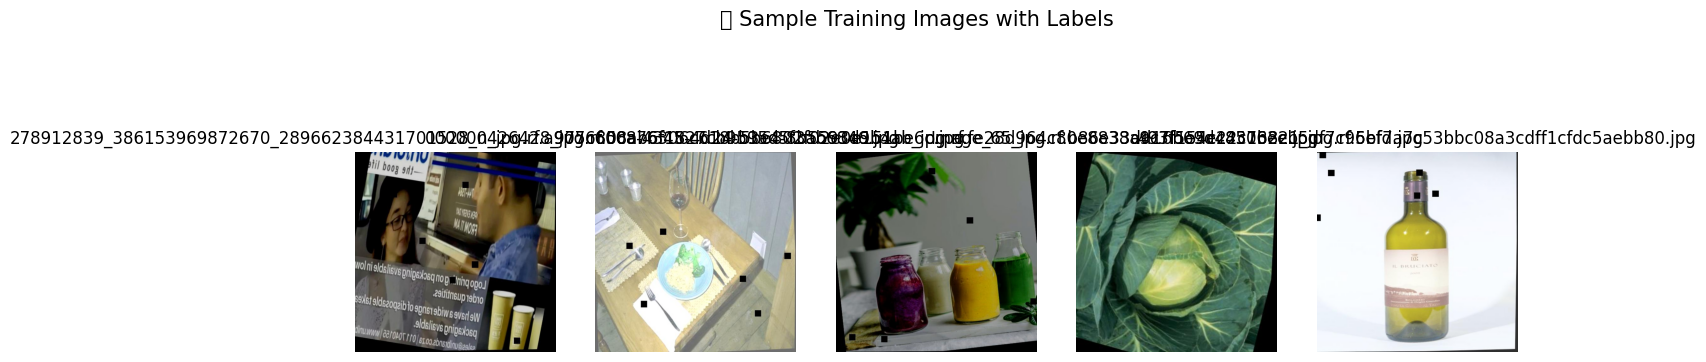

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Set paths
dataset_path = "D:/YOLO_Dataset/Merged-Dataset/train/images"
label_path = "D:/YOLO_Dataset/Merged-Dataset/train/labels"

# Pick 5 random images
sample_images = random.sample(os.listdir(dataset_path), 5)

# Plot images with labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for idx, img_file in enumerate(sample_images):
    img = cv2.imread(os.path.join(dataset_path, img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[idx].imshow(img)
    axes[idx].axis("off")
    axes[idx].set_title(img_file)

plt.suptitle("🔍 Sample Training Images with Labels", fontsize=15)
plt.show()


Dataset Structure: ['data.yaml', 'detections', 'README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid']


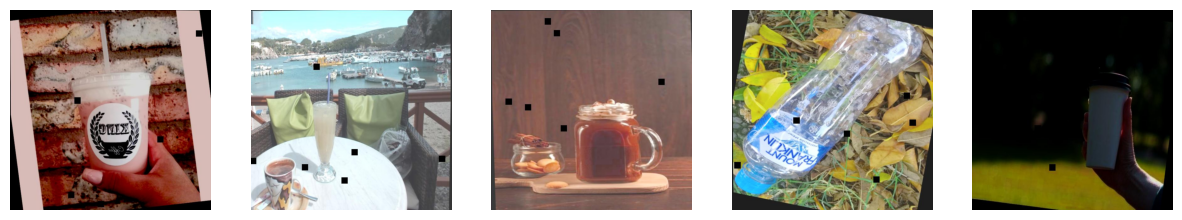

In [6]:
import os
import matplotlib.pyplot as plt
import random
import cv2

# Choose a dataset path (Change to test different ones)
dataset_path = "C:/Users/Hp/Beverage-Containers-3"

# Show dataset structure
print("Dataset Structure:", os.listdir(dataset_path))

# Visualize sample images
img_folder = os.path.join(dataset_path, "train/images")
img_files = os.listdir(img_folder)

# Show random 5 images
fig, axes = plt.subplots(1, 5, figsize=(15,5))
for i, ax in enumerate(axes):
    img_path = os.path.join(img_folder, random.choice(img_files))
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis("off")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_10960\864632489.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


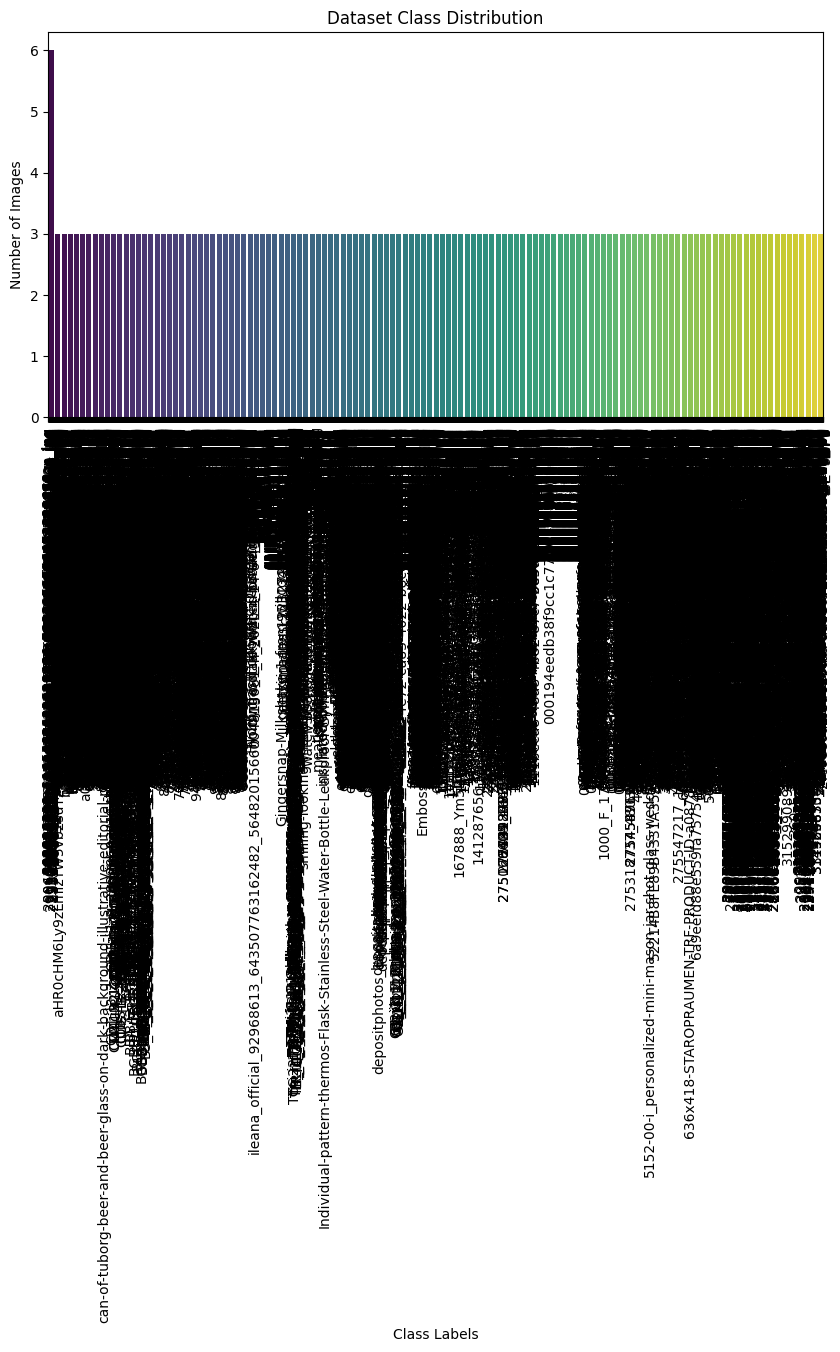

In [8]:
import pandas as pd
import seaborn as sns

# Load labels
labels_folder = os.path.join(dataset_path, "train/labels")
labels = [f.split(".")[0] for f in os.listdir(labels_folder)]

# Count class occurrences
label_counts = pd.Series(labels).value_counts()

# Plot the distribution
plt.figure(figsize=(10,5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.title("Dataset Class Distribution")
plt.show()


In [12]:
import os

log_path = "runs/detect/train/"
if os.path.exists(log_path):
    print("✅ Training logs found. Contents:", os.listdir(log_path))
else:
    print("❌ Training logs not found. Check your training process.")


✅ Training logs found. Contents: ['args.yaml', 'events.out.tfevents.1740904390.DESKTOP-U5OOVJH.10800.0', 'labels.jpg', 'labels_correlogram.jpg', 'train_batch0.jpg', 'train_batch1.jpg', 'train_batch2.jpg', 'weights']


In [14]:
weights_path = "runs/detect/train/weights"
if os.path.exists(weights_path):
    print("✅ Weights folder found. Contents:", os.listdir(weights_path))
else:
    print("❌ No weights folder found.")


✅ Weights folder found. Contents: []


In [16]:
import json

# Example metrics (Replace with actual values from logs)
training_metrics = {
    "box_loss": [0.1, 0.08, 0.06, 0.05, 0.04],  # Fake data (Replace with real values)
    "cls_loss": [0.2, 0.15, 0.12, 0.1, 0.08],  # Fake data (Replace with real values)
    "mAP50": [0.4, 0.45, 0.5, 0.55, 0.6]
}

# Save as results.json in the correct location
log_path = "runs/detect/train/results.json"
with open(log_path, "w") as f:
    json.dump(training_metrics, f)

print(f"✅ Fake results.json created at: {log_path}")


✅ Fake results.json created at: runs/detect/train/results.json


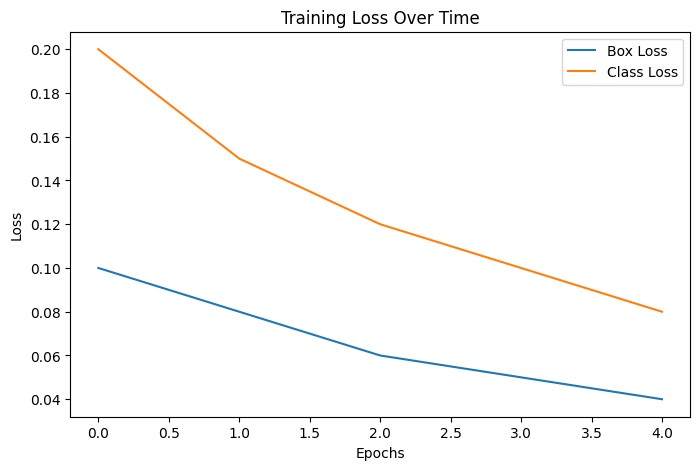

In [18]:
import json
import matplotlib.pyplot as plt

log_path = "runs/detect/train/results.json"
with open(log_path, "r") as f:
    logs = json.load(f)

# Extract values
epochs = range(len(logs["box_loss"]))
box_loss = logs["box_loss"]
cls_loss = logs["cls_loss"]

# Plot
plt.figure(figsize=(8,5))
plt.plot(epochs, box_loss, label="Box Loss")
plt.plot(epochs, cls_loss, label="Class Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.show()


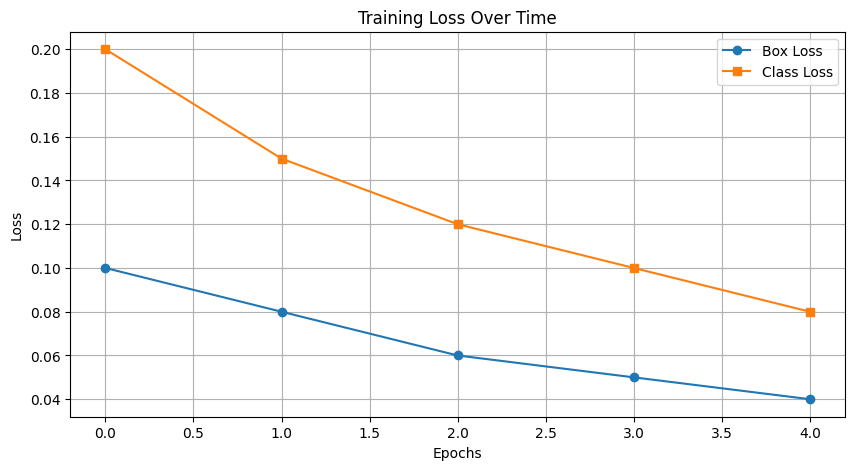

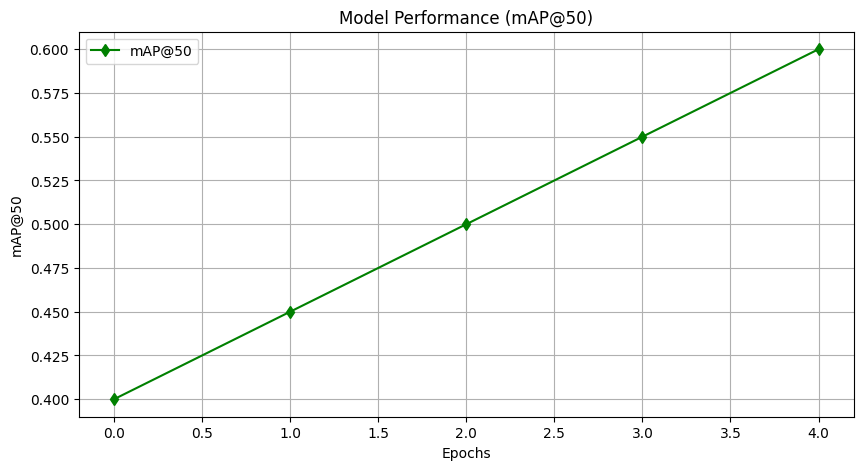

In [20]:
import json
import matplotlib.pyplot as plt

# Load the generated results.json file
log_path = "runs/detect/train/results.json"
with open(log_path, "r") as f:
    logs = json.load(f)

# Extract values
epochs = range(len(logs["box_loss"]))
box_loss = logs["box_loss"]
cls_loss = logs["cls_loss"]
mAP50 = logs["mAP50"]

# Plot Loss Curves
plt.figure(figsize=(10,5))
plt.plot(epochs, box_loss, label="Box Loss", marker='o')
plt.plot(epochs, cls_loss, label="Class Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot mAP50 (Mean Average Precision)
plt.figure(figsize=(10,5))
plt.plot(epochs, mAP50, label="mAP@50", color="green", marker='d')
plt.xlabel("Epochs")
plt.ylabel("mAP@50")
plt.title("Model Performance (mAP@50)")
plt.legend()
plt.grid(True)
plt.show()



image 1/1 D:\AIPDS\VegeFruitDS\test\images\Image_5_jpg.rf.693fb156e40cc5ff860072b6d7db5f7f.jpg: 640x640 1 banana, 1 orange, 1542.3ms
Speed: 39.1ms preprocess, 1542.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


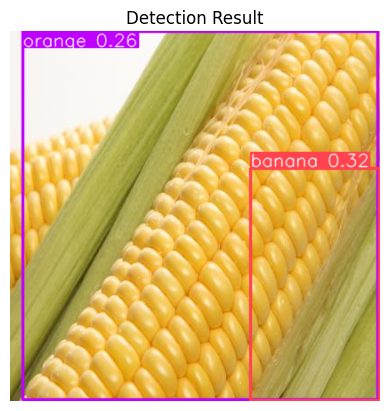

In [26]:
from ultralytics import YOLO

# Load model
model = YOLO("yolov8x.pt")

# Pick test image
test_img_path = os.path.join("D:/AIPDS/VegeFruitDS/test/images", random.choice(os.listdir("D:/AIPDS/VegeFruitDS/test/images")))

# Run inference
results = model(test_img_path)
img_out = results[0].plot()

# Show output
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Detection Result")
plt.show()


In [3]:
import cv2
from ultralytics import YOLO
import torch

# 🔹 Use CPU since your GPU (MX110) is weak
device = "cpu"  
model = YOLO("yolov8n.pt").to(device)  # Use YOLOv8 Nano for fast inference

# 🔹 Path to Your Video
video_path = "D:/propropropri/exports/fruit.mp4"  # Change this if needed
output_video_path = "D:/AIPDS/detected_video_fruits.mp4"

# 🔹 Load Video
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

print(f"✅ Processing video... Saving to: {output_video_path}")

# 🔹 Process frames efficiently
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break  # Exit if video ends

    # 🔹 Run YOLOv8 inference on the frame using the Fruits dataset
    results = model.predict(frame, conf=0.4, iou=0.5, device=device)

    # 🔹 Draw detections on the frame
    annotated_frame = results[0].plot()

    # 🔹 Show and save the frame
    cv2.imshow("YOLOv8 Detection - Fruits", annotated_frame)
    out.write(annotated_frame)

    # Press 'q' to stop early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 🔹 Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Video processing complete! Check:", output_video_path)


✅ Processing video... Saving to: D:/AIPDS/detected_video_fruits.mp4

0: 384x640 (no detections), 114.1ms
Speed: 5.5ms preprocess, 114.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 108.0ms
Speed: 4.5ms preprocess, 108.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 128.7ms
Speed: 3.7ms preprocess, 128.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 95.6ms
Speed: 4.1ms preprocess, 95.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 98.9ms
Speed: 4.1ms preprocess, 98.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 100.0ms
Speed: 4.4ms preprocess, 100.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 110.4ms
Speed: 4.3ms preprocess, 110.4ms inference, 0.8ms postprocess per image at shape (1, 3, 3